<a href="https://colab.research.google.com/github/yonghwadragon/hidden-layer-training-visualization/blob/main/hiddenlayer_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y(10)= (0.213390,0.276098,0.316126,0.289752,0.269197,0.267629)
E(y,t)=0.103166
y(50)= (0.109808,0.234903,0.340498,0.302115,0.284875,0.284170)
E(y,t)=0.095928
y(100)= (0.060886,0.192589,0.364553,0.305791,0.290988,0.290719)
E(y,t)=0.091309
y(200)= (0.035619,0.139613,0.397566,0.261279,0.250047,0.250012)
E(y,t)=0.087869
y(300)= (0.016975,0.048605,0.127061,0.127863,0.128125,0.128126)
E(y,t)=0.129844
y(500)= (0.045202,0.069884,0.933653,0.927516,0.061643,0.049180)
E(y,t)=0.001900
y(1000)= (0.022630,0.036227,0.965514,0.962442,0.033544,0.024757)
E(y,t)=0.000514
y(2000)= (0.013997,0.022766,0.978452,0.976225,0.021634,0.015324)
E(y,t)=0.000204
y(3000)= (0.010947,0.017898,0.983137,0.981230,0.017182,0.011948)
E(y,t)=0.000126
y(4000)= (0.009274,0.015201,0.985728,0.984011,0.014681,0.010090)
E(y,t)=0.000091
y(5000)= (0.008183,0.013432,0.987423,0.985839,0.013026,0.008879)
E(y,t)=0.000071
y(6000)= (0.007401,0.012158,0.988641,0.987157,0.011828,0.008010)
E(y,t)=0.000058
y(7000)= (0.006806,0.011186,0.989569

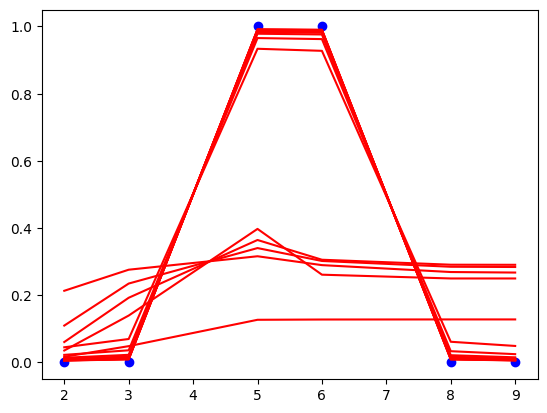

y(10001)= (0.005621,0.009244,0.991416,0.990183,0.009065,0.006037)
E(y,t)=0.000034


In [ ]:
# hiddenlayer machine
import numpy as np
import matplotlib.pyplot as plt
def p(uu):
    return 1/(1+np.exp(-uu))
def Dp(uu):
    return np.exp(-uu)/(1+np.exp(-uu))**2
def E(yy,tt):
    return np.sum(0.5*(yy-tt)**2)/6
x=np.array([[2],[3],[5],[6],[8],[9]])
t=np.array([[0],[0],[1],[1],[0],[0]])
w=np.array([[-4,1],[6.5,-1]])
v=np.array([-1,1,1])
plt.plot(x,t,'bo');
tol=1.0e-15; resid=tol*2; eta=2.5; maxiter=1.0e4;
n=1; E1=1000; y=np.zeros([1,6])
while resid >=tol and n<=maxiter:
    for m in range(0,len(t)):
        xx=np.vstack([[1],[x[m]]])
        uh=np.dot(w,xx); z=p(uh)
        z=np.vstack([[1],z])
        uo=np.dot(v,z)
        y[0,m]=p(uo)
        dEdv=(y[0,m]-t[m])*Dp(uo)*z.T
        dEdw=((y[0,m]-t[m])*Dp(uo))*(Dp(uh)*v.T[1:])*xx.T
        v=v-eta*dEdv
        w=w-eta*dEdw
    for m in range(0,len(t)):
        xx=np.vstack([[1],[x[m]]])
        uh=np.dot(w,xx); z=p(uh)
        z=np.vstack([[1],z])
        uo=np.dot(v,z)
        y[0,m]=p(uo)
    E2=E(y.T,t); resid=abs(E2-E1); E1=E2; n+=1
    if (n==10 or n==50 or n==100 or n==200 or \
        n==300 or n==500 or np.mod(n,1000)==0):
        print('y(%d)=' %(n), '(%f,%f,%f,%f,%f,%f)' %tuple(y.T))
        print('E(y,t)=%f' %(E1))
        plt.plot(x,y.T,'r-')

plt.show()
print('y(%d)=' %(n), '(%f,%f,%f,%f,%f,%f)' %tuple(y.T))
print('E(y,t)=%f' %(E1))